<a href="https://colab.research.google.com/github/Jimmy-Rais/Machine-Learning/blob/main/DiseasePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MACHINE LEARNING FOR DISEASE PREDICTION `**

IMPORT LIBRARIES

In [1]:

#Importing the libraries
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Import the files module from google.colab to enable file uploading functionality within a Colab notebook.
#This allows users to upload files from their local file system into the Colab environment for processing.
#The uploaded files are stored in a dictionary named 'uploaded', where the keys are the file names and the values are the data that have been uploaded.
from google.colab import files
uploaded = files.upload()


Saving Training.csv to Training.csv


In [4]:
#Load the uploaded 'Training (1).csv' file into a pandas DataFrame 'df' for data manipulation, then create a copy 'df_orig' to preserve the original data.

import pandas as pd
import io

df=pd.read_csv(io.BytesIO(uploaded['Training.csv']))
df_orig=df.copy()

In [5]:
#Replace categorical labels with numeric values for model compatibility, with each disease assigned a unique integer identifier.

df.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
'Migraine':11,'Cervical spondylosis':12,
'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
'(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
'Impetigo':40}},inplace=True)

#spliting features and targets from the dataset
x=df.drop('prognosis',axis=1)
y=df['prognosis']
y_orig=df_orig['prognosis']
sympt_samples=["muscle_pain","diarrhoea","constipation","back_pain","sweating","stomach_pain","itching","shivering"]
#First rows of the dataset
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Exploratory data analysis(EDA)
  #Understand the target variable(predicted disease)
df_orig['prognosis'].value_counts()


Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

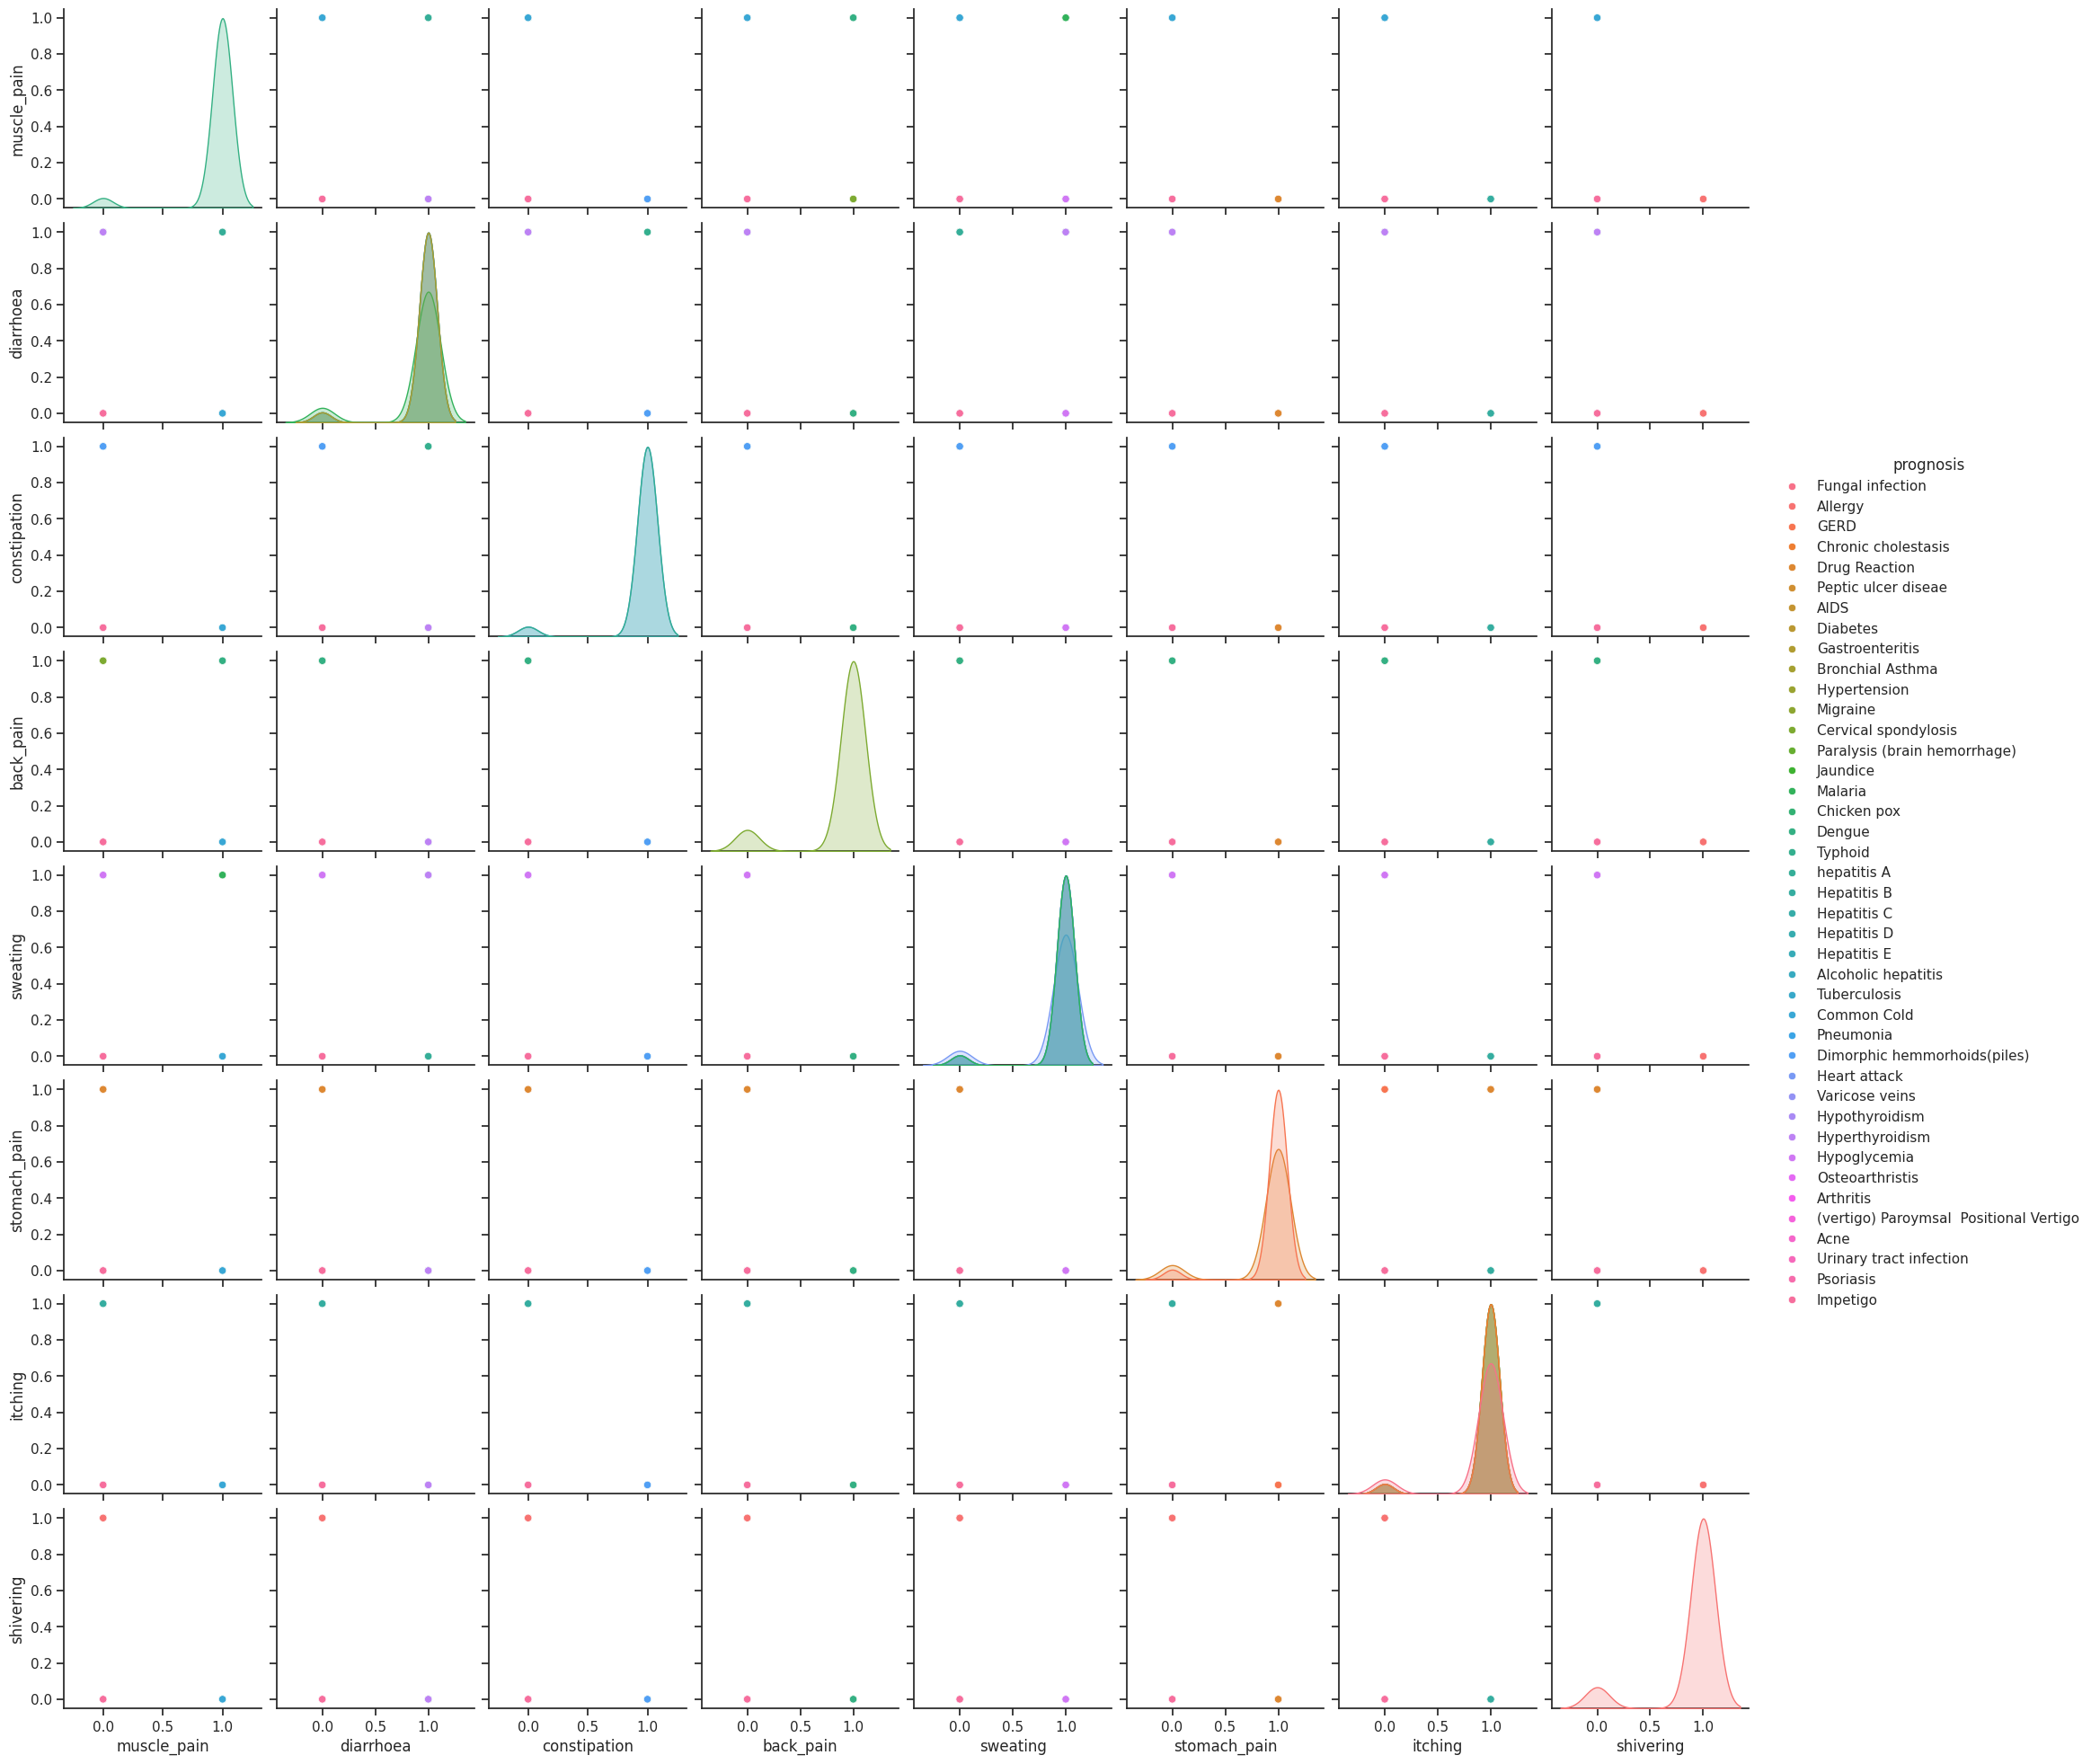

In [7]:
#Data visualization
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(df_orig,hue='prognosis',vars=sympt_samples)
plt.show()

In [44]:

#Model Training
'''
We are going to compare the performance of 2 Learning algorithms(Softmax regression and Xgboost Classifier(Boosted trees),
 and pick the one with the highest F1-score(Precision and recall trade-off),
We are aiming to maintain a fair ratio between accuracy and recall because our dataset does not diagnosis rare diseases,and the goal of the project
is not to replace medical check-ups but instead to encourage them,hence we want to make sure that the trade-off between precision and recall is fair
'''
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
#Train_set ,validation_set and test_set creation
      #70% of data is used for training
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3,random_state=1)
      #15% of data is used for the validation set and 15% is used for the test set
x_valid,x_test,y_valid,y_test=train_test_split(x_val,y_val,test_size=0.5,random_state=1)
#Learning algorithms initialization(Softmax Regression and XGB Classifier)
clf2=xgb.XGBClassifier()
clf3=LogisticRegression(multi_class='multinomial',max_iter=1000)
#Softmax
#Hyperparameters tuning and model performance comparisons using GridSearchCv
models={
    'xgb_Classifier':{
       'model_name':clf2,
       'params':{

      'max_depth': [10, 15, 20],
      'learning_rate':[0.002,0.001,0.0001],
         },
       },
      'SoftmaxRegression':{
        'model_name':clf3,
        'params':{
            'C':[0.002,0.001,0.0001],
         },
     },
      }

#F1 score (Precision vs accuracy trade off)
score=[]
for model_name,mp in models.items():
  scoring_metrics = {'f1_macro': 'f1_macro', 'precision': 'precision_macro', 'recall': 'recall_macro'}
  clf=GridSearchCV(mp['model_name'],mp['params'],cv=3,return_train_score=False,scoring=scoring_metrics,refit='f1_macro')
  clf.fit(x_train,y_train)
  score.append({
      'model':model_name,
      'F1_Score':clf.best_score_,
      'best_params':clf.best_params_,
      'precision': clf.cv_results_['mean_test_precision'][clf.best_index_],
      'recall': clf.cv_results_['mean_test_recall'][clf.best_index_],
  })

#Convert the result in a panda dataframe
score_df = pd.DataFrame(score, columns=['model', 'F1_Score', 'best_params', 'precision', 'recall'])
# Styling the DataFrame
styled_df = score_df.style.format({
    'F1_Score': "{:.2%}",
    'precision': "{:.2%}",
    'recall': "{:.2%}"
}).background_gradient(cmap='viridis', subset=['F1_Score', 'precision', 'recall']).set_properties(**{
    'text-align': 'left',
}).set_caption("Model Performance Comparison").set_table_styles([{
    'selector': 'caption',
    'props': [('color', 'red'), ('font-size', '16px')]
}])
# Display the styled DataFrame
styled_df




,model,F1_Score,best_params,precision,recall
0,xgb_Classifier,98.86%,"{'learning_rate': 0.002, 'max_depth': 10}",99.00%,98.84%
1,SoftmaxRegression,95.56%,{'C': 0.002},95.45%,96.34%


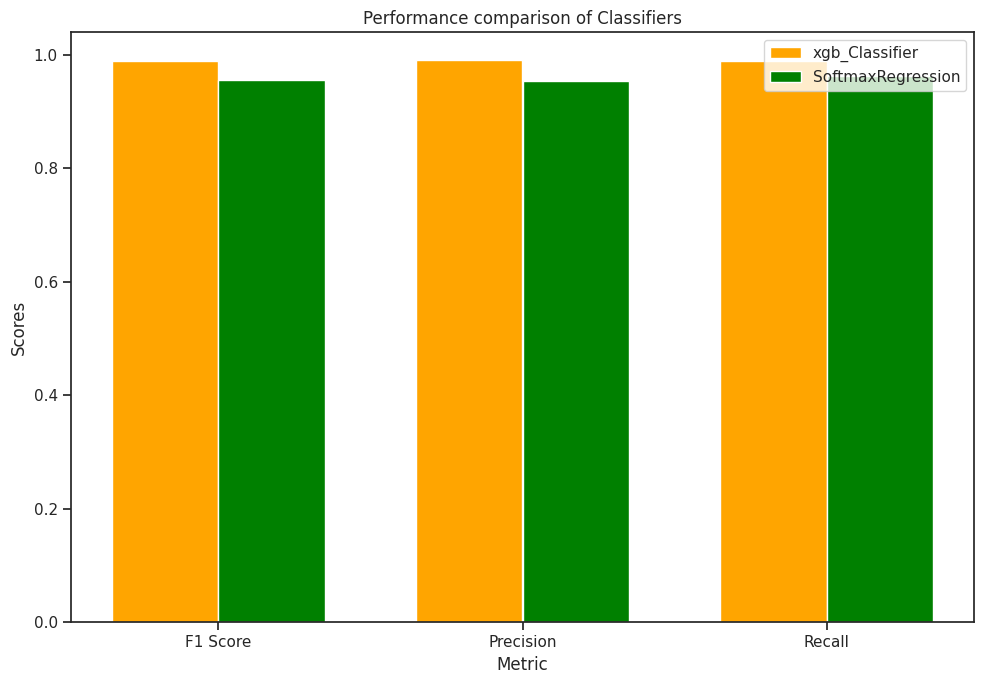

In [32]:
#Model performance plots
fig, ax = plt.subplots(figsize=(10, 7))
n_metrics = 3  # F1, Precision, Recall
n_classifiers = len(score_df)
index = np.arange(n_metrics)
bar_width = 0.35
colors = ['orange', 'green']
for i, row in enumerate(score_df.itertuples()):
    scores = [row.F1_Score, row.precision, row.recall]
    ax.bar(index + i * bar_width, scores, bar_width, label=row.model, color=colors[i])
ax.set_xlabel('Metric')
ax.set_ylabel('Scores')
ax.set_title('Performance comparison of Classifiers')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['F1 Score', 'Precision', 'Recall'])
ax.legend()
plt.tight_layout()
plt.show()



In [43]:
from sklearn.metrics import f1_score

# Assuming the existence of x_val, y_val for validation set and x_test, y_test for test set
val_scores = []
test_scores = []

for model_name, mp in models.items():
    # Retrieve the best model parameters for the current model
    best_params = score_df.loc[score_df['model'] == model_name, 'best_params'].values[0]
    model = mp['model_name'].set_params(**best_params)

    # Re-train the model on the entire training dataset
    model.fit(x_train, y_train)

    # Predict and calculate F1 score on the validation dataset
    y_pred_val = model.predict(x_val)
    f1_val = f1_score(y_val, y_pred_val, average='macro')
    val_scores.append({'model': model_name, 'f1_macro_val': f1_val})

    # Predict and calculate F1 score on the test dataset
    y_pred_test = model.predict(x_test)
    f1_test = f1_score(y_test, y_pred_test, average='macro')
    test_scores.append({'model': model_name, 'f1_macro_test': f1_test})

# Convert the scores into DataFrames
val_score_df = pd.DataFrame(val_scores)
test_score_df = pd.DataFrame(test_scores)
#Convert the result in a panda dataframe
val_score_df_2= pd.DataFrame(val_scores, columns=['model', 'F1_Score'])
test_score_df_2=pd.DataFrame(test_scores, columns=['model', 'F1_Score'])

# Display the styled DataFrame
print("Validation scores", val_score_df)
print("===================================")
print("Test scores",test_score_df)

IndexError: index 0 is out of bounds for axis 0 with size 0

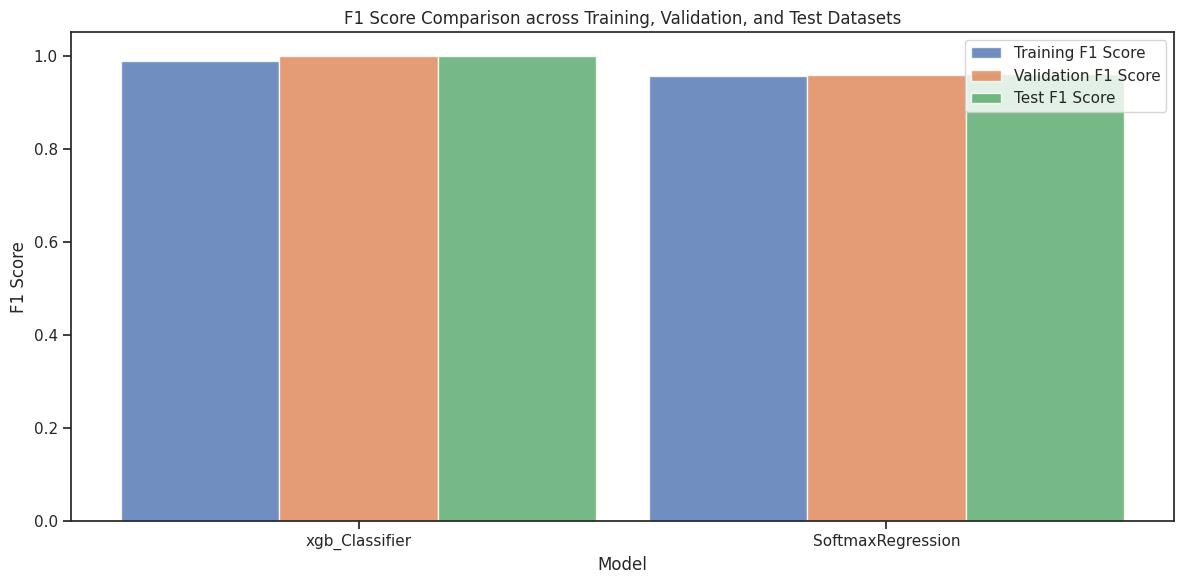

In [35]:
# Merge training scores with validation and then with test scores
final_scores_df = pd.merge(score_df[['model', 'F1_Score']], val_score_df, on='model')
final_scores_df = pd.merge(final_scores_df, test_score_df, on='model')

final_scores_df.rename(columns={'best_score': 'f1_macro_training'}, inplace=True)
import matplotlib.pyplot as plt
import numpy as np

# Settings for the plot
models = final_scores_df['model']
index = np.arange(len(models))
bar_width = 0.3

plt.figure(figsize=(12, 6))
plt.bar(index, final_scores_df['F1_Score'], bar_width, label='Training F1 Score', alpha=0.8)
plt.bar(index + bar_width, final_scores_df['f1_macro_val'], bar_width, label='Validation F1 Score', alpha=0.8)
plt.bar(index + 2*bar_width, final_scores_df['f1_macro_test'], bar_width, label='Test F1 Score', alpha=0.8)

plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison across Training, Validation, and Test Datasets')
plt.xticks(index + bar_width, models)
plt.legend()

plt.tight_layout()
plt.show()

Performance of the best model on the validation set is F1_Score:  (0.9607046070460704,)


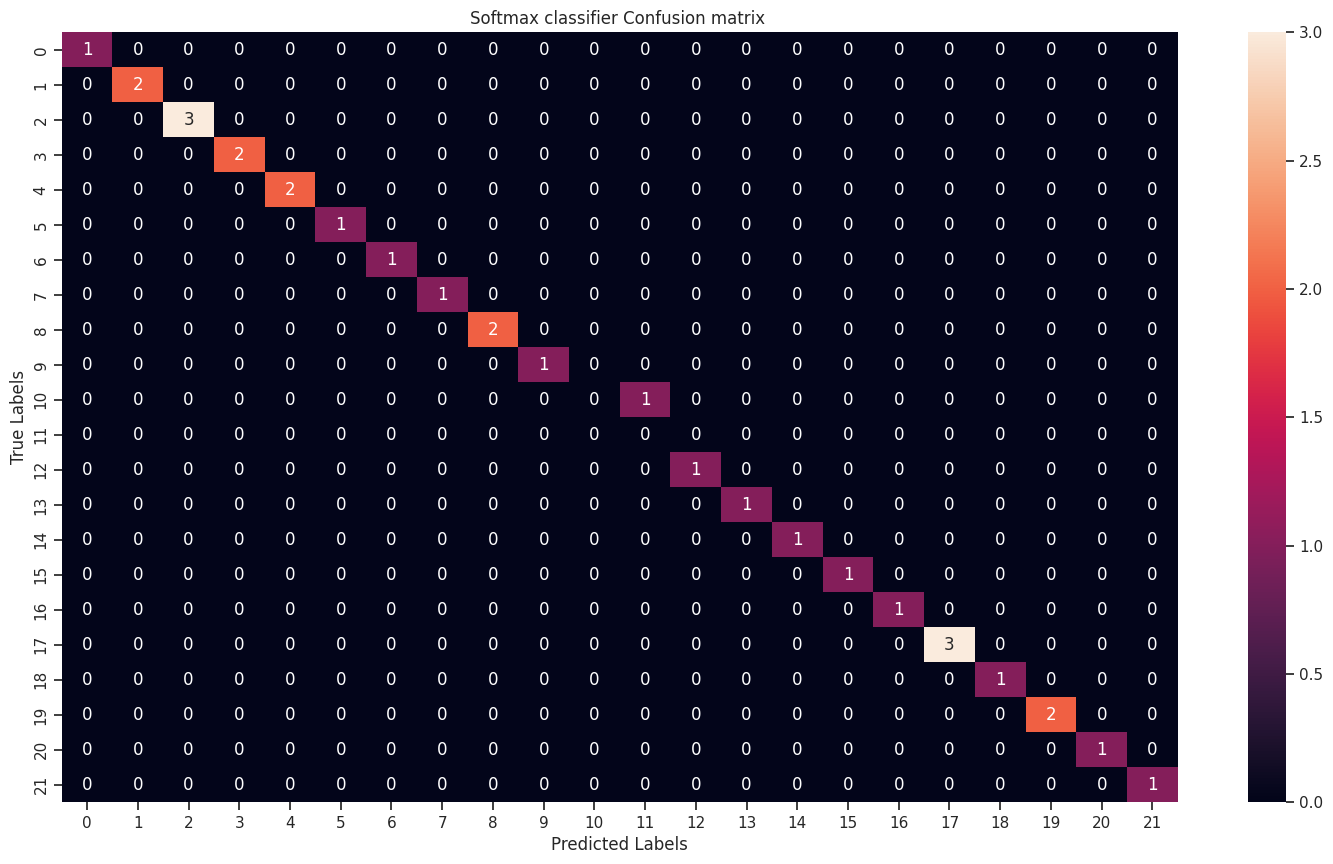

In [41]:
#Softmax Classifier Confusion matrix
 #Validation score
pred_val=clf3.predict(x_valid),
pred_df=pd.DataFrame(pred_val)
y_valid_pred=pred_df.iloc[0,:]
val_score=sklearn.metrics.f1_score(y_valid,y_valid_pred, average='micro'),
print("Performance of the best model on the validation set is F1_Score: ",val_score),
 #Test score\
pred_test=clf3.predict(x_test),
pred_df_test=pd.DataFrame(pred_test)
y_test_pred=pred_df_test.iloc[0,:]
test_score=sklearn.metrics.f1_score(y_test,y_test_pred, average='micro'),
plt.figure(figsize = (18,10))
sns.heatmap(sklearn.metrics.confusion_matrix(y_test[70:100], y_test_pred[70:100]), annot = True,),
#xticklabels =(y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer')
plt.title("Softmax classifier Confusion matrix ")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()





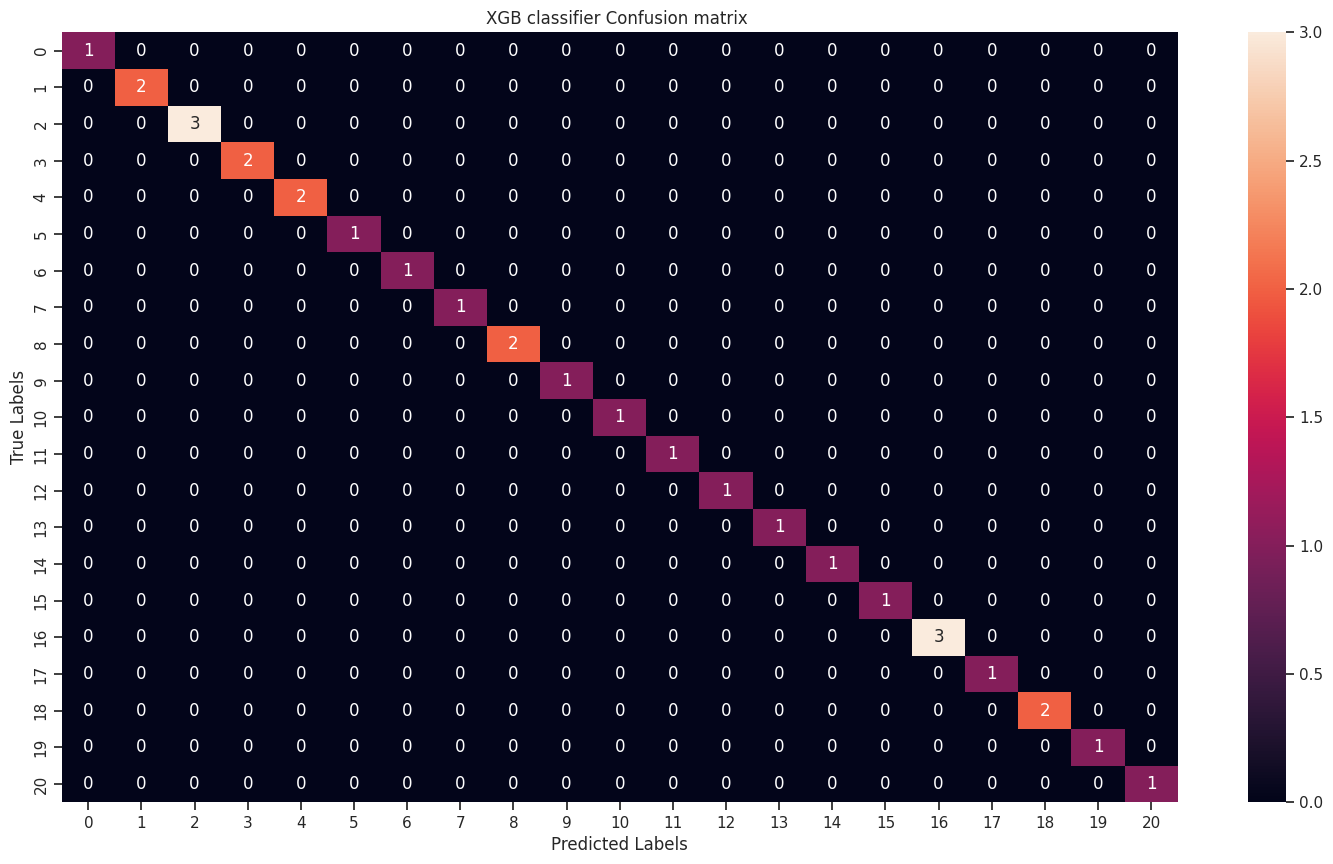

In [42]:
#XGB Classifier Confusion matrix
 #Validation score
pred_val2=clf2.predict(x_valid),
pred_df2=pd.DataFrame(pred_val2)
y_valid_pred2=pred_df2.iloc[0,:]
val_score2=sklearn.metrics.f1_score(y_valid,y_valid_pred2, average='micro'),

 #Test score\
pred_test2=clf2.predict(x_test),
pred_df_test2=pd.DataFrame(pred_test2)
y_test_pred2=pred_df_test2.iloc[0,:]
test_score2=sklearn.metrics.f1_score(y_test,y_test_pred2, average='micro'),
plt.figure(figsize = (18,10))
sns.heatmap(sklearn.metrics.confusion_matrix(y_test[70:100], y_test_pred2[70:100]), annot = True,),
#xticklabels =(y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer')
plt.title("XGB classifier Confusion matrix ")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()






In [38]:

#Predictions
def my_pred(my_symptoms):
 l=df.drop('prognosis',axis=1).columns.tolist()
 print(len(l))
 disease=['Fungal infection','Allergy','GERD','Chronic cholestasis','Drug Reaction',
 'Peptic ulcer diseae','AIDS','Diabetes','Gastroenteritis','Bronchial Asthma','Hypertension',
 ' Migraine','Cervical spondylosis',
 'Paralysis (brain hemorrhage)','Jaundice','Malaria','Chicken pox','Dengue','Typhoid','hepatitis A',
 'Hepatitis B','Hepatitis C','Hepatitis D','Hepatitis E','Alcoholic hepatitis','Tuberculosis',
 'Common Cold','Pneumonia','Dimorphic hemmorhoids(piles)',
 'Heartattack','Varicoseveins','Hypothyroidism','Hyperthyroidism','Hypoglycemia','Osteoarthristis',
 'Arthritis','(vertigo) Paroymsal  Positional Vertigo','Acne','Urinary tract infection','Psoriasis',
 'Impetigo']
 l2=[]
 for x in range(0,len(l)):
     l2.append(0)
 for k in range(0,len(l)):
        for z in my_symptoms:
            if(z==l[k]):
                l2[k]=1
 inputtest =[l2]
 predictions= clf.predict(inputtest)
 dict={'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
 'Peptic ulcer diseae':5,'AIDS':6,'Diaitemsbetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
 'Migraine':11,'Cervical spondylosis':12,
 'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
 'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
 'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
 'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
 '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
 'Impetigo':40}
 Disease_pred=[key for key,value in dict.items() if value==predictions]
 return Disease_pred
#Input examples

symptoms = ["belly_pain","diarrhoea","depression","internal_itching","sweating"]
print(f"With the sysmptoms{symptoms} ,the prediction gives: ",my_pred(symptoms))



132
With the sysmptoms['belly_pain', 'diarrhoea', 'depression', 'internal_itching', 'sweating'] ,the prediction gives:  ['Malaria']


In [39]:
#save the model
import joblib
joblib.dump(clf,'disease.pkl')

['disease.pkl']